# Run this in the SEED EEG File

In [16]:
import os
import numpy as np 
import pickle
from ipynb.fs.full.fullDataExtraction import getRawArrayData
from ipynb.fs.full.LabelTesting import makeOutThreeArr
import tensorflow as tf
from ipynb.fs.full.featureExtraction import getAllFeatureData

### data prepping

In [17]:
x_data=getAllFeatureData()

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (210429, 13)
#### Single_Label Multi_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Multi_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
##############

In [18]:
label=x_data[:, -2]
label_arr = makeOutThreeArr(label)
train_data=np.delete(x_data, -1, 1)
train_data=np.delete(train_data, -1, 1)

## function for visualizing the loses

In [19]:
import matplotlib.pyplot as plt
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

## defining model (can be better)

In [20]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                  metrics=['accuracy'])

## model traning, will take a bit (make sure laptop is plugged in)

In [21]:
history = nn_model.fit(
    train_data, label_arr, epochs=1500, batch_size=50, validation_split=0.6, shuffle=True, verbose=0
  )

## training visualization

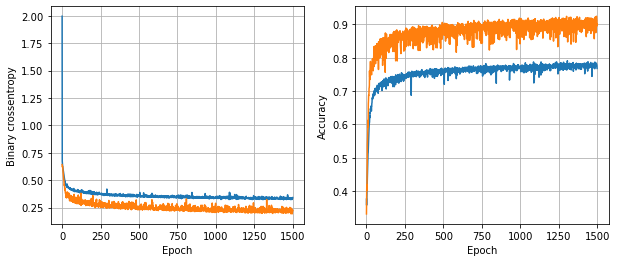

In [22]:
plot_history(history)

In [23]:
history.history['accuracy'][-1]

0.7681202292442322

In [24]:
history.history['val_accuracy'][-1]

0.9007071256637573